### About the Data

The dataset primarily focuses on tweets by users from across the world, on Black Friday 2021. The data has been analysed, cleaned and visualizations have been plotted as part of this Jupyter notebook.

Data source : https://www.kaggle.com/datasets/mathurinache/black-friday-tweets?select=BlackFriday_tweets.csv

Types of attributes :   
user_name - String;
user_location - String;
user_description - String;
user_created - DateTime;
user_followers - Integer;
user_friends - Integer;
user_favourites - Integer;
user_verified - Boolean;
date - DateTime;
text - String;
hashtags - String;
source - String;
is_retweet - Boolean
                        
                       
                                           

In [1]:
import pandas as pd
import numpy as np

# Read csv file from the publicly available Google Drive URL
drive_url = 'https://drive.google.com/file/d/15PW0MM8g-vgHkR1gm28qY0jq3Wbqf0bG/view?usp=sharing'
drive_url = 'https://drive.google.com/uc?id=' + drive_url.split('/')[-2]
input_data = pd.read_csv(drive_url)

# Print the metadata
print(input_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         10000 non-null  object
 1   user_location     7072 non-null   object
 2   user_description  9469 non-null   object
 3   user_created      10000 non-null  object
 4   user_followers    10000 non-null  int64 
 5   user_friends      10000 non-null  int64 
 6   user_favourites   10000 non-null  int64 
 7   user_verified     10000 non-null  bool  
 8   date              10000 non-null  object
 9   text              10000 non-null  object
 10  hashtags          7724 non-null   object
 11  source            10000 non-null  object
 12  is_retweet        10000 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 879.0+ KB
None


As observed, the dataset consists of 10,000 rows and 13 attributes of types string, integer, date, boolean.

### Code to ensure uniqueness in observations

In [2]:
input_data = input_data.drop_duplicates(subset=['date', 'text'])

print(input_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         9995 non-null   object
 1   user_location     7069 non-null   object
 2   user_description  9464 non-null   object
 3   user_created      9995 non-null   object
 4   user_followers    9995 non-null   int64 
 5   user_friends      9995 non-null   int64 
 6   user_favourites   9995 non-null   int64 
 7   user_verified     9995 non-null   bool  
 8   date              9995 non-null   object
 9   text              9995 non-null   object
 10  hashtags          7720 non-null   object
 11  source            9995 non-null   object
 12  is_retweet        9995 non-null   bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 956.6+ KB
None


The attributes 'date' and 'text' are used to identify unique records.

### Handling Missing Values

In [3]:
# Print the count of missing values in the dataset

print(input_data.isna().sum())

user_name              0
user_location       2926
user_description     531
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2275
source                 0
is_retweet             0
dtype: int64


Missing values in 'user_location' are filled with 'Other'

In [4]:
input_data['user_location'].fillna('Other', inplace=True)

Missing values in 'user_description' are filled with 'NA'

In [5]:
input_data['user_description'].fillna('NA', inplace=True)

Missing values in 'hastags' are filled with using the mode

In [6]:
input_data['hashtags'].fillna(input_data['hashtags'].mode()[0], inplace=True)                                            

In [7]:
print(input_data.isna().sum())

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
is_retweet          0
dtype: int64


### Strategy used for Data Exploration

The dataset contains tweets from all over the world, but our analysis is focused more on individual countries like - USA, UK, India & South Africa.

We observed that the entries in the 'location' column contained one of - country name, abbreviation, states, cities. Our first task involved cleaning this data.

We used an open source dataframe to help refine our dataset.

In [8]:

# Read dataframe from Google drive
location_drive_url = 'https://drive.google.com/file/d/1nNNFir6W9pJDOJaOaqbaE6MnjqHcmJis/view?usp=share_link'
location_drive_url = 'https://drive.google.com/uc?id=' + location_drive_url.split('/')[-2]
location_mapping = pd.read_csv(location_drive_url)

## US
input_data.loc[input_data['user_location'].astype(str).str.contains('USA', case = False), 'user_location'] = 'USA'
input_data.loc[input_data['user_location'].astype(str).str.contains('United States', case = False), 'user_location'] = 'USA'
input_data.loc[input_data['user_location'].astype(str).str.contains('#UnitedStates', case = False), 'user_location'] = 'USA'
input_data.loc[input_data['user_location'].astype(str).str.contains('United State', case = False), 'user_location'] = 'USA'

def renametoUSA(df, a):
    df.loc[df['user_location'].astype(str).str.contains(str(a)), 'user_location'] = 'USA' 

for i in location_mapping['us_state']:
    renametoUSA(input_data, i)
    
for j in location_mapping['us_state_code']:
    renametoUSA(input_data, j)

## UK
input_data.loc[input_data['user_location'].astype(str).str.contains('UK', case = False), 'user_location'] = 'UK'
input_data.loc[input_data['user_location'].astype(str).str.contains('United Kingdom', case = False), 'user_location'] = 'UK'
input_data.loc[input_data['user_location'].astype(str).str.contains('England', case = False), 'user_location'] = 'UK'
    
for k in location_mapping['uk_city']:
    input_data.loc[input_data['user_location'].astype(str).str.contains(str(k), case = False), 'user_location'] = "UK"

## India
input_data.loc[input_data['user_location'].astype(str).str.contains('India', case = False), 'user_location'] = "India"

for l in location_mapping['india_city']:
    input_data.loc[input_data['user_location'].astype(str).str.contains(str(l), case = False), 'user_location'] = "India"
    
## South Africa
input_data.loc[input_data['user_location'].astype(str).str.contains('South Africa', case = False), 'user_location'] = "South Africa"
input_data.loc[input_data['user_location'].astype(str).str.contains('South Afrika', case = False), 'user_location'] = "South Africa"

for m in location_mapping['sa_city']:
    input_data.loc[input_data['user_location'].astype(str).str.contains(str(m), case = False), 'user_location'] = "South Africa"
    
input_data.loc[~input_data['user_location'].isin(['USA','UK','South Africa','India','Other']),'user_location'] = 'Other'


Since our analysis is only focused on a select few countries, the rest of the locations are replaced with 'Other'.

## Types of Visualizations

### Bar Graph

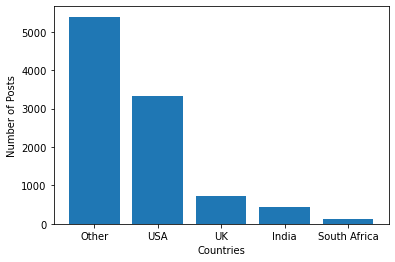

In [9]:
import matplotlib.pyplot as plt

#extracting the unique countries and counting the number of rows for each of the country
posts = input_data.user_location.value_counts().reset_index()
countries = input_data.user_location.value_counts().index

#Label the x and y axis
plt.xlabel('Countries')
plt.ylabel('Number of Posts')

#plot the graph
plt.bar(countries, posts.user_location, width = 0.8)
plt.show()


For this Bar Graph, we take the cleaned up dataframe and count the number of rows for each country using the value_counts() method, the .reset_index() is used to create a dataframe consisting of country names and their corresponding counts of rows. We then pull out the country name associated with each index and the value of row count to be used as the 2 variables for the bar graph.

### Line Graph

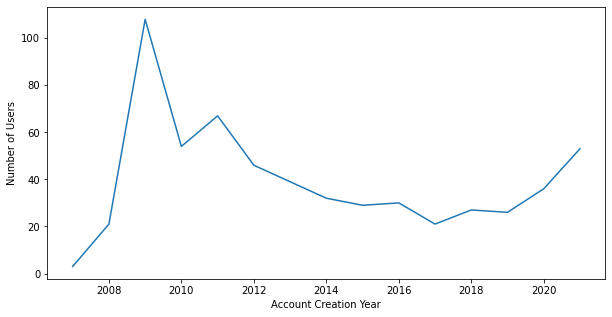

In [10]:
# Filter data frame to include rows only where user location is UK
line_input_data=input_data.loc[input_data['user_location'] == 'UK']

#Dropping the duplicates in username
line_input_data=line_input_data.drop_duplicates(subset=['user_name'])

#Extract year of creation from 'user_created' using string slicing and convert it to int type
line_input_data['user_created'] = line_input_data['user_created'].str[:4].astype(int)

#create a dataframe consisting of row count for each year and sort the data in ascending order
users=line_input_data.user_created.value_counts().reset_index()
usercount=users.sort_values('index',inplace=False)

years=line_input_data.user_created.value_counts().index

#Plot the Line Graph with Labels
plt.figure(figsize=(10, 5))
plt.xlabel('Account Creation Year')
plt.ylabel('Number of Users')
plt.plot(years.sort_values(), usercount.user_created)


We see the number of account created in each year in this line graph.We first take a subset of our original dataset for this analysis, the subset consists of row items whose location is UK. Befor the visualization we drop duplicates with respect to username and then count the number of rows for each year of account creation. The concept of string slicing is utilized to get the first four characters from the user created column i.e. the year component of the timestamp. These two values are then used to plot the line graph

### Scatter Plot

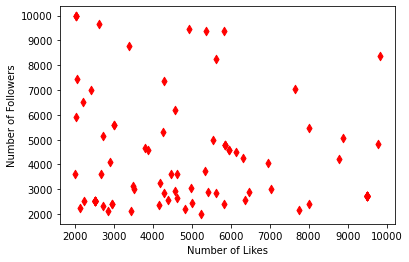

In [11]:
# Filter data frame to include rows only where user location is UK
scatter_input_data = input_data[input_data.user_location == 'UK']

# Filter data frame to consider moderately popular users, i.e., users with followers greater than 2000 & less than 10000
scatter_input_data = scatter_input_data[(scatter_input_data.user_favourites < 10000) & (scatter_input_data.user_favourites > 2000)]
scatter_input_data = scatter_input_data[(scatter_input_data.user_followers < 10000) & (scatter_input_data.user_followers > 2000)]

# Set the x & y axes
x = scatter_input_data.user_favourites
y = scatter_input_data.user_followers

# Label the x & y axes
plt.xlabel('Number of Likes')
plt.ylabel('Number of Followers')

# Plot the scatter plot
plt.scatter(x, y, color = 'red', marker = "d")

The scatter plot illustrates the correlation bewtween the users' number of followers and the number of likes received for tweets. For this, 'user_followers' and 'user_favourites' columns in the dataset were used. In order to show a comprehensible visualization, we examined those users who have over 2000 followers and tweets which have over 2000 likes. 

### Histogram

/var/folders/7y/9v7jt1613qz8n2qgz5x8zxhr0000gn/T/ipykernel_79801/3849025044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_input_data['date_hour'] = hist_input_data['date'].str[10:13]


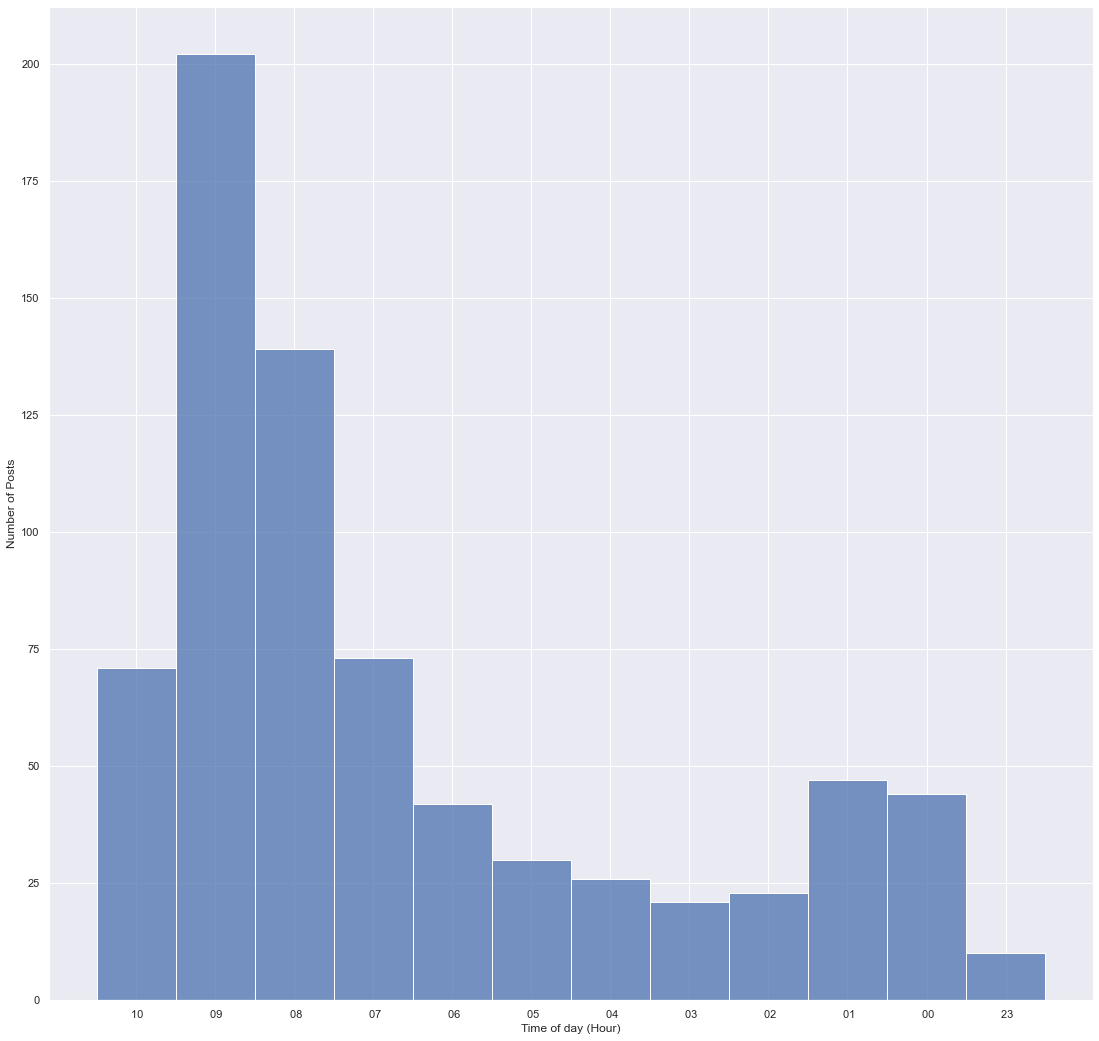

In [12]:
import seaborn as sns

# Filter data frame to include rows only where user location is UK
hist_input_data = input_data[input_data.user_location == 'UK']
hist_input_data['date_hour'] = hist_input_data['date'].str[10:13]

sns.set(rc = {'figure.figsize':(18.7,18.27)})

hist = sns.histplot(data = hist_input_data, x = "date_hour")

hist.set(xlabel='Time of day (Hour)', ylabel='Number of Posts')
plt.show()

The above Histogram depicts number of tweets made during every hour on the of day of Black Friday. Histogram is an approximate representation of the distribution of numerical data. Here for tweets originating from UK, substring has been applied to the date column to get hour of the day. And using Seaborn, histogram has been plotted.

### Pie Chart

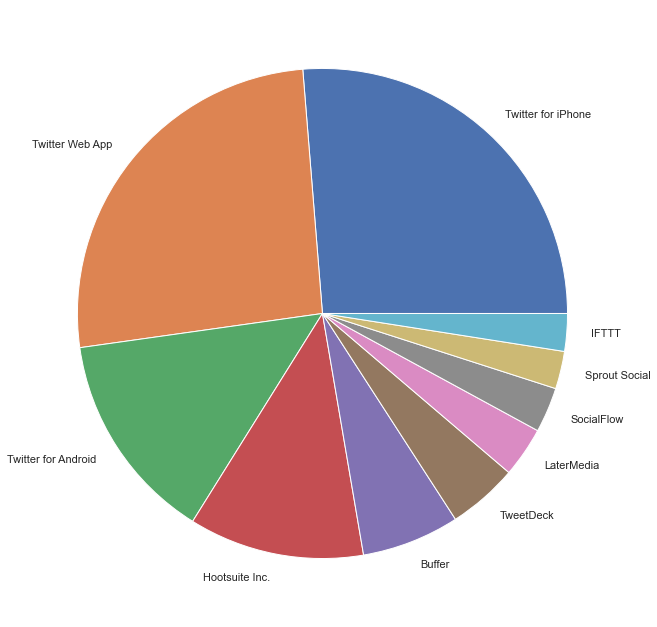

In [17]:
import operator

# Filter data frame to include rows only where user location is UK

pie_input_data = input_data[input_data.user_location == 'UK']

# Initialize empty dictionary
word_freq = {}

# Add words with count to the dictionary
for i in pie_input_data.source:
    if i not in word_freq:
        word_freq[i] = 0
    word_freq[i] += 1

# Sort dictionary in desceding order, to include top 10 sources
limited_word_freq = dict(sorted(word_freq.items(), key=operator.itemgetter(1), reverse=True)[:10])

# Plot the pie chart
plt.pie(limited_word_freq.values(), labels=limited_word_freq.keys())
plt.show()

The above pie chart represents the top sources through which users (in UK) tweeted on Black Friday. The 'source' column in the dataset is used to plot the chart. A dictionary is used to store the count of different words, with the key being the word and value being the word count. This dictionary is then sorted in descending order according to the values and the top ten words (sources) are plotted on the pie chart.

### Box Plot

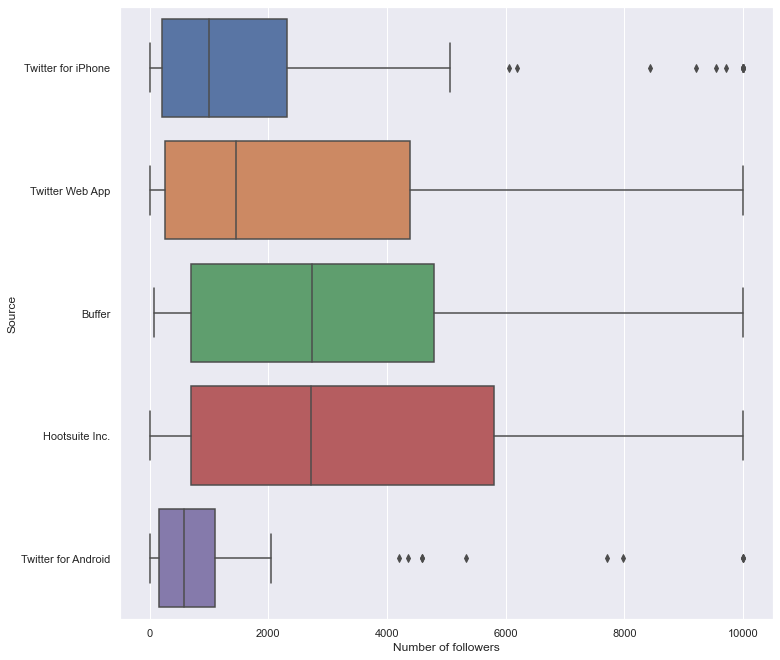

In [14]:
# Filter data frame to include rows only where user location is UK
box_input_data = input_data[input_data.user_location == 'UK']
box_input_data.loc[box_input_data["user_followers"] > 10000, "user_followers"] = 10000

top_sources = list(limited_word_freq.keys())

df2 = box_input_data.loc[(box_input_data['source'] == top_sources[0]) | (box_input_data['source'] == top_sources[1]) | (box_input_data['source'] == top_sources[2]) | (box_input_data['source'] == top_sources[3]) | (box_input_data['source'] == top_sources[4]) ]

sns.set(rc={'figure.figsize':(11.7,11.27)})

box = sns.boxplot( y=df2["source"], x=df2["user_followers"])
box.set(xlabel='Number of followers', ylabel='Source')
plt.show()


Here, the above Box plot visually show the distribution of number of followers by source of medium used for tweeting. Here the user_followers' count which is greater 10000 have been made equal to 10000. Since the user_followers feature has very wide range of high values they have been made equal to 10k so that box plot accomodates them. Finally, seaborn boxplot function has been used to plot boxplot.

### Heat Map

In [15]:

# Function to fetch most commonly used hashtags
def getTopHashtags(heat_input_data):
    hashtags = heat_input_data.hashtags.str.lower().tolist()

    for i in range(len(hashtags)):
        hashtags[i] = eval(hashtags[i])

    heat_word_freq = {}

    for i in hashtags:
        for j in i:
            if j not in heat_word_freq:
                heat_word_freq[j] = 0
            heat_word_freq[j] += 1

    heat_limited_word_freq = dict(sorted(heat_word_freq.items(), key=operator.itemgetter(1), reverse=True)[:10000])
    
    return heat_limited_word_freq

hashtags_USA = getTopHashtags(input_data[input_data.user_location == 'USA'])
hashtags_UK = getTopHashtags(input_data[input_data.user_location == 'UK'])
hashtags_Other = getTopHashtags(input_data[input_data.user_location == 'Other'])
hashtags_all = getTopHashtags(input_data)


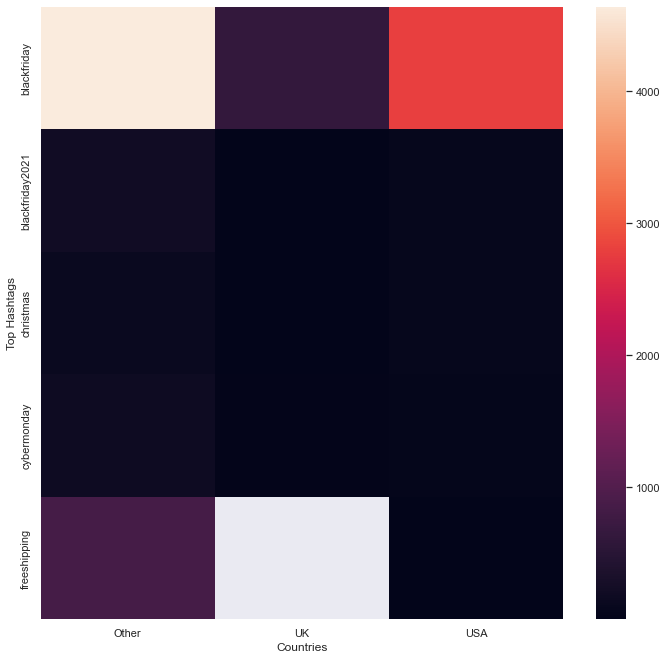

In [16]:
hashtags_array = np.array([hashtags_Other.get('blackfriday'), hashtags_UK.get('blackfriday'), hashtags_USA.get('blackfriday'),
                hashtags_Other.get('freeshipping'), hashtags_UK.get('freeshipping'), hashtags_USA.get('freeshipping'),
                hashtags_Other.get('blackfriday2021'), hashtags_UK.get('blackfriday2021'), hashtags_USA.get('blackfriday2021'),
                hashtags_Other.get('cybermonday'), hashtags_UK.get('cybermonday'), hashtags_USA.get('cybermonday'),
                hashtags_Other.get('christmas'), hashtags_UK.get('christmas'), hashtags_USA.get('christmas')
                ])

top_hastags = list(hashtags_all.keys())
countries = ['Other', 'UK', 'USA']
 
np_hashtags = np.repeat((top_hastags[0],top_hastags[1],top_hastags[2],top_hastags[3],top_hastags[4]),3)
np_countries = countries*5
value = hashtags_array
df = pd.DataFrame({'np_countries': np_countries, 'np_hashtags': np_hashtags, 'value': value })

df_wide = df.pivot_table( index='np_hashtags', columns='np_countries', values='value')

heat = sns.heatmap(df_wide)
heat.set(xlabel='Countries', ylabel='Top Hashtags')
plt.show()

This heatmaps depicts the most commonly used hashtags in tweets from USA, UK and other countries. Dictionaries are used to count the most commonly occuring hastags in different countries. A numpy array is used to store the counts of these words. A data frame is then created with the list of countries in consideration, the top hashtag words overall and the corresponding count value in the countries. This is converted into a pivot table and then plotted as a heat map.